<b> MIS 382N: ADVANCED MACHINE LEARNING<b>
    
#### Muskaan Singhania (ms88283) and Disha Gandhi (dsg2258)

Assignment 2

Total points: 70

Due: Friday, September 23 to be submitted via Canvas by 11:59 pm

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names and UT EIDs.**

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Bias and Variance (10 pts)

### (a). (4 pts) Describe the difference between model bias and the bias of a point estimator. 

<b>Model Bias</b>

Model Bias is a phenomenon that occurs when the model has the tendency to learn wrong patterns from the data. It creates prejudice towards the output variable generated by the model which is quite different from the true value.
When the predicted values are far from the true values we say that the model is biased but if the values predicted by a model is very close to or equivalent to true value then we can say that the model is unbiased.
It is also said that the Model bias is measured on the training set and gives us a glimpse of the error introduced on training set predictions.

<b> Bias of a Point Estimator </b>

Whereas Bias of a point estimator is defined as the difference between the expected value of the estimator and the value of the parameter being estimated. It is calculated on a sample and the expected value of the estimator is average across all the samples to compare with the true value of the population. When the estimated value of the parameter and the value of the parameter being estimated are equal, the estimator is considered unbiased. Likewise if the values are very different then the point estimator over the samples is considered biased.

<b>The Difference</b>

There is no difference in between them in particular because both are measures of error just calculated on a different scale. And at the end of the day both are evaluating biases in the predicted value just point estimator bias is on a sample obtained on the dataset and model bias is evaluated on the whole training dataset.

### (b) (6 pts). How can you use a learning curve to determine whether a model is overfitting  (for a given sample size)? Discuss this with respect to the observed train and validation error curves. How does your answer change if the model you are trying to determine if the model is underfitting?

Few basic <b>charachteristics of an overfit model</b> is:

1) It has a **perfect training score but a really poor test score.**

2) Using a complex model over a simple data set causes the model to find **unnecessary patterns in the dataset** along with picking noise and wrongly classifying the test dataset.

3) The **dataset being really small** might cause the model to make each data point as a new pattern even if the pattern does not exist.

Similarly a few basic <b>charachteristics of an underfit model</b> is:

1) It has a **low training score and a low test/validation score.**

2) Using a simple model for a complex problem **does not allow the model to identify or pick the patterns** it is supposed to.

3) The underlying dataset might actually **not have a pattern at all** and we are unnecessarily trying to find a relation.

Now **Learning Curve is used to plot training and validation score over a set of training data** where we incrementally add new training data. The x axis holds the **size of the training data** and the y axis holds the **model loss** with two line plots representing training and validation losses on the same dataset. They help us in identifying if we add more training data to the model, will the **performance of the model increase or decrease on the unseen data.**

So when we add more training examples to the model, the trend in the validation score tells us if our model is underfit or overfit when compared to the training error curve. If **adding more training data is decreasing the validation loss** which doesn't even flatten and the **training loss increases slightly** then the model might be **OVERFIT**. Indicating that increasing training data might improve model performance on unseen data. Apart from this the **Training loss and Validation loss are far from each other for an overfit model.**

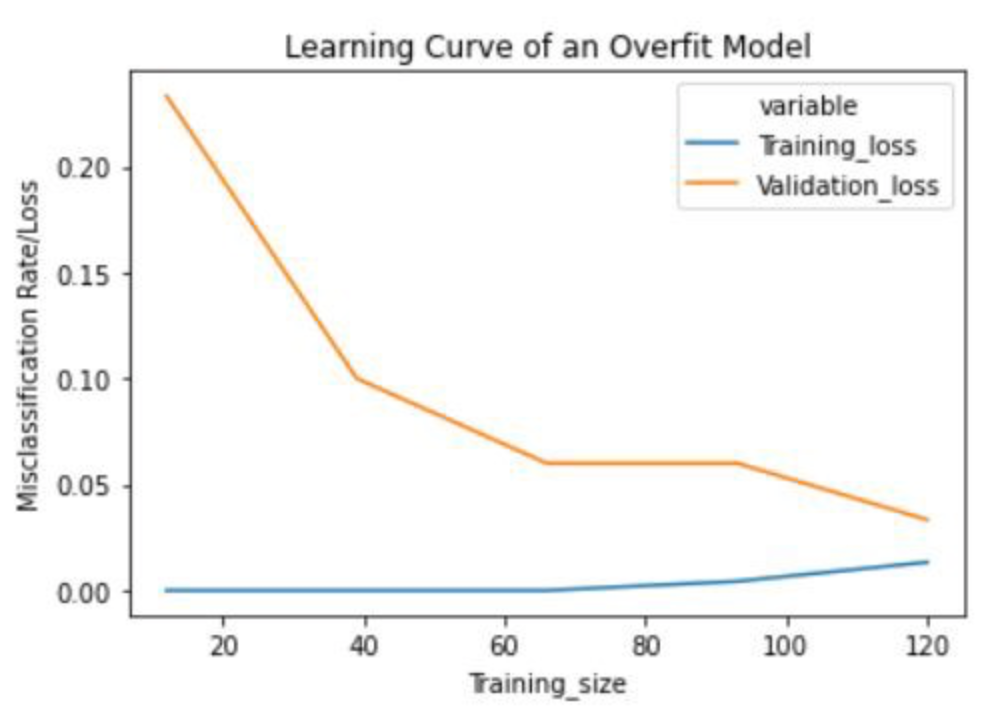

In [10]:
from IPython import display
display.Image("https://raw.githubusercontent.com/GandhiDisha/Advanced-Machine-Learning-Course/b3cfb5e286e99b366e70fb7b6840abf050f69c68/Homework%202/images/overfit.png", width="500")

Whereas in case of an **UNDERFIT** model, the **validation loss is high when data is extremely less** and then as we increase the training data, **the validation loss decreases and might even go to a very minimum value towards the end.** The **training loss in this case starts from a very low value at the start and just increases as the data size keeps increasing** because incase of underfitting if the **model is not right then any amount of data might not help** but if it's a right model then increasing the data size might also lead to a sharp decrease in the loss after the usual increase.

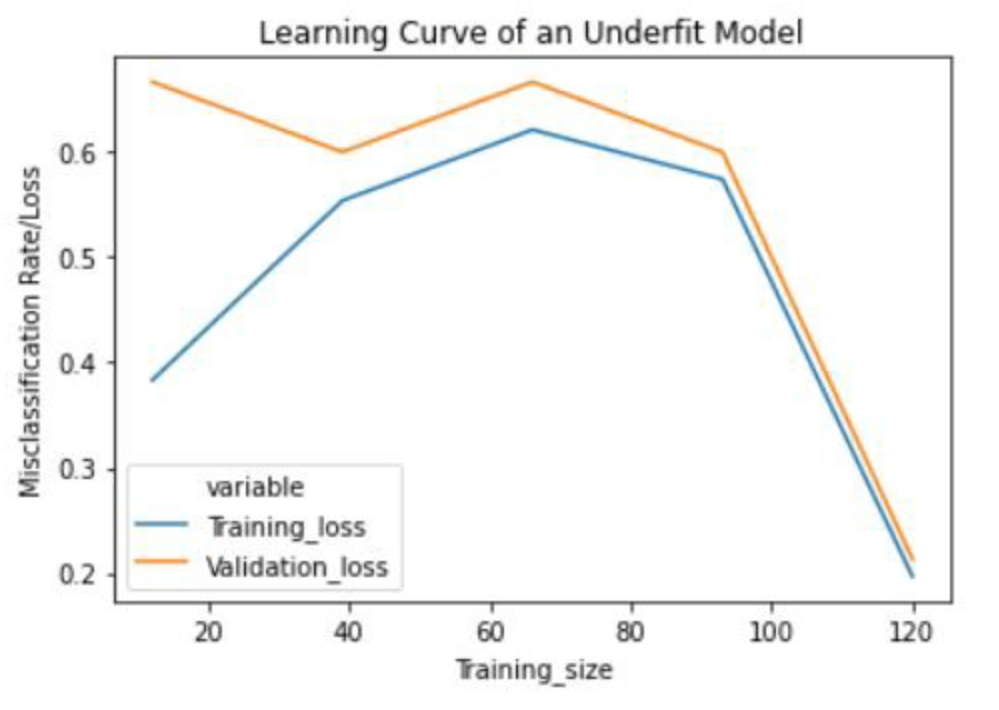

In [9]:
display.Image("https://raw.githubusercontent.com/GandhiDisha/Advanced-Machine-Learning-Course/b3cfb5e286e99b366e70fb7b6840abf050f69c68/Homework%202/images/underfit.png", width="500")

# Question 2: Bias-Variance Exploration (20 pts)
We want to build a model that can predict y for unknown inputs x.

### (a) (10 pts) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. Tips: you can use np.vander(np.squeeze(x_train), deg+1) to generate the deg-degree polynomial vector of x_train. For example, np.vander(np.squeeze(x_train), 3) gives you the second-degree polynomial of x_train.

In [12]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import time
import math
%matplotlib inline

In [14]:
data_load = np.load('./data.npy', allow_pickle = True)

In [15]:
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-10,10,101).reshape(-1,1)

lrp = LinearRegression()

In [16]:
def plot_curves(x_train, y_train, x_test, y_test):
  
    #2nd degree curve fitting
    x_train_2deg = np.vander(np.squeeze(x_train), 3)
    lrp_2deg = LinearRegression()
    lrp_2deg.fit(x_train_2deg, y_train)
    
    #4th degree curve fitting
    x_train_4deg = np.vander(np.squeeze(x_train), 5)
    lrp_4deg = LinearRegression()
    lrp_4deg.fit(x_train_4deg, y_train)
    
    #7th degree curve fitting
    x_train_7deg = np.vander(np.squeeze(x_train), 8)
    lrp_7deg = LinearRegression()
    lrp_7deg.fit(x_train_7deg, y_train)
    
    # to get a smooth curve we will need to sort first
    x_test_sorted = np.sort(x_test, axis=0, kind='quicksort', order=None) 
    x_train_sorted = np.sort(x_train, axis=0, kind='quicksort', order=None)
    x_all_sorted = np.sort(x_all, axis=0, kind='quicksort', order=None)
    
    lrp_rmse_2 = mean_squared_error(y_train, lrp_2deg.predict(np.vander(np.squeeze(x_train), 3)))
    lrp_rmse_4 = mean_squared_error(y_train, lrp_4deg.predict(np.vander(np.squeeze(x_train), 5)))
    lrp_rmse_7 = mean_squared_error(y_train, lrp_7deg.predict(np.vander(np.squeeze(x_train), 8)))
    train_mse=[lrp_rmse_2, lrp_rmse_4, lrp_rmse_7]
    
    lrp_rmse_2 = mean_squared_error(y_test, lrp_2deg.predict(np.vander(np.squeeze(x_test), 3)))
    lrp_rmse_4 = mean_squared_error(y_test, lrp_4deg.predict(np.vander(np.squeeze(x_test), 5)))
    lrp_rmse_7 = mean_squared_error(y_test, lrp_7deg.predict(np.vander(np.squeeze(x_test), 8))) 
    test_mse=[lrp_rmse_2, lrp_rmse_4, lrp_rmse_7]
    
    fig, ax = plt.subplots(figsize=(20,20), nrows=3, ncols=1);
    plt.subplot(3, 1,1)
    plt.scatter(x_train, y_train,s=10, color='black')
    plt.plot(x_train_sorted, lrp_2deg.predict(np.vander(np.squeeze(x_train_sorted), 3)), color='orange', label='2nd degree')
    plt.plot(x_train_sorted, lrp_4deg.predict(np.vander(np.squeeze(x_train_sorted), 5)), color='green', label='4th degree')
    plt.plot(x_train_sorted, lrp_7deg.predict(np.vander(np.squeeze(x_train_sorted), 8)), color='blue', label='7th degree')
    plt.title('X Train vs Y Train Predicted')
    plt.xlabel('x train')
    plt.ylabel('y train & predicted')
    plt.legend()
    
    plt.subplot(3, 1,2)
    plt.scatter(x_test, y_test,s=10, color='black')
    plt.plot(x_test_sorted, lrp_2deg.predict(np.vander(np.squeeze(x_test_sorted), 3)), color='orange', label='2nd degree')
    plt.plot(x_test_sorted, lrp_4deg.predict(np.vander(np.squeeze(x_test_sorted), 5)), color='green', label='4th degree')
    plt.plot(x_test_sorted, lrp_7deg.predict(np.vander(np.squeeze(x_test_sorted), 8)), color='blue', label='7th degree')
    plt.title('X Test vs Y Predicted')
    plt.xlabel('x test')
    plt.ylabel('y test & predicted')
    plt.legend()
    
    plt.subplot(3, 1,3)
    plt.plot(x_all_sorted, lrp_2deg.predict(np.vander(np.squeeze(x_all_sorted), 3)), color='orange', label='2nd degree')
    plt.plot(x_all_sorted, lrp_4deg.predict(np.vander(np.squeeze(x_all_sorted), 5)), color='green', label='4th degree')
    plt.plot(x_all_sorted, lrp_7deg.predict(np.vander(np.squeeze(x_all_sorted), 8)), color='blue', label='7th degree')
    plt.title('X All vs Y All Predicted')
    plt.xlabel('x all')
    plt.ylabel('y all predicted')
    plt.legend()
    
    print('Train MSE for 2nd degree, 4th degree, and 7th degree polynomial respectively is as follows:')
    print(train_mse)

    print('Test MSE for 2nd degree, 4th degree, and 7th degree polynomial respectively is as follows:')
    print(test_mse)
    
    time.sleep(2)
    plt.show()

    return train_mse, test_mse

Train MSE for 2nd degree, 4th degree, and 7th degree polynomial respectively is as follows:
[247.29679797371534, 31.72001805729004, 30.677193592109738]
Test MSE for 2nd degree, 4th degree, and 7th degree polynomial respectively is as follows:
[320.0640834697786, 31.292082886606718, 33.410694077690145]


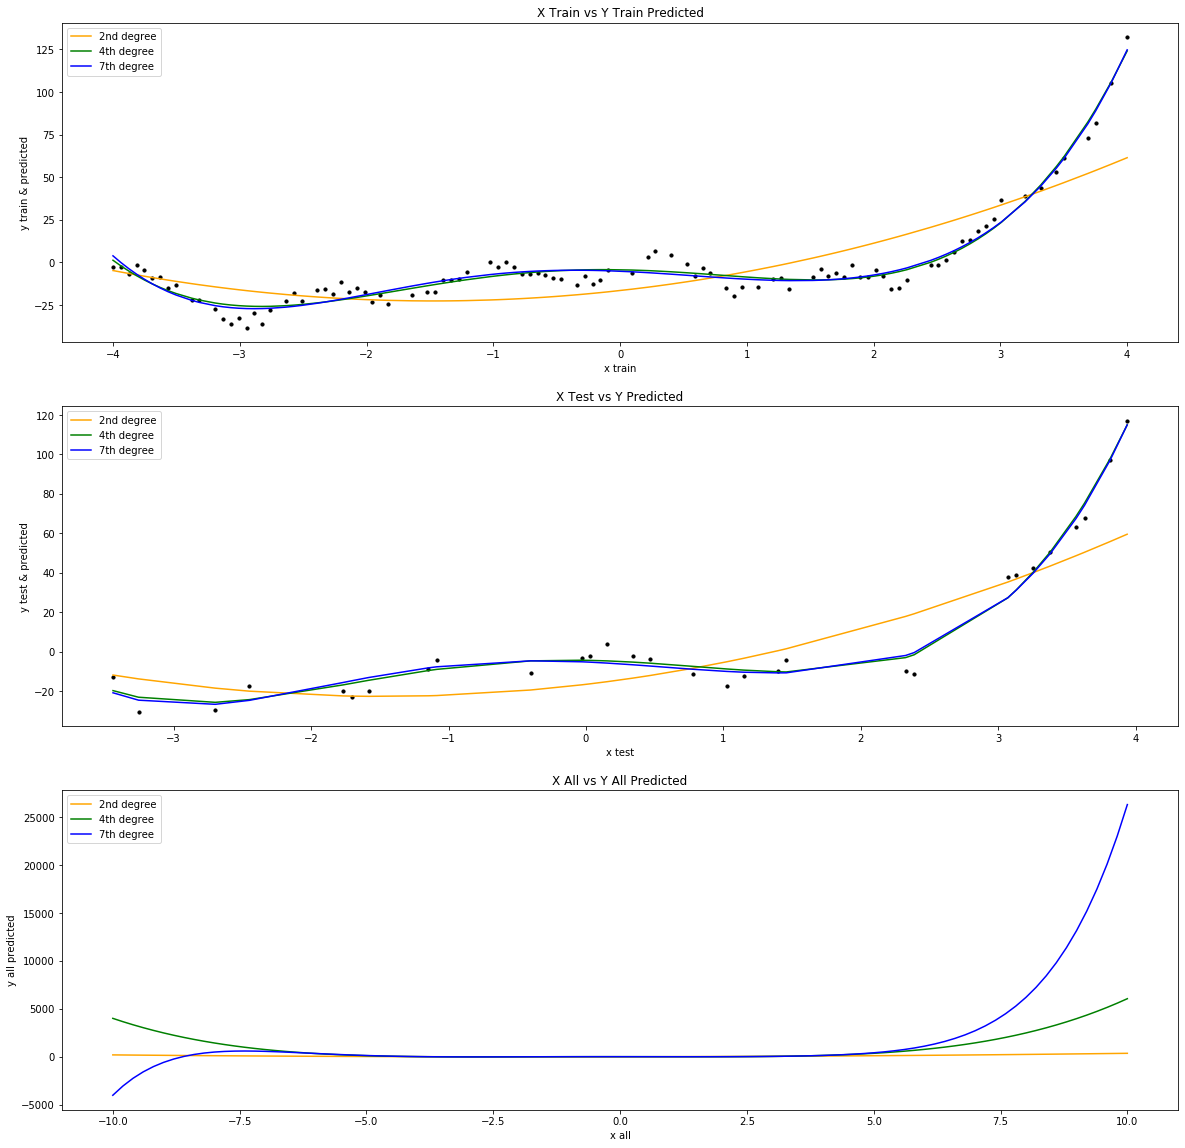

In [17]:
# Fit the different polynomials to the training data and make the plots 
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

### (b) (5 pts) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

There are some general notions which have been observed on the complexity of the model chosen which is as the **complexity of the model increases the flexibility of the model also increases.** So when we increase the degrees of a polynomial, we are making it more complex.

Now coming back to **Variance,** it is evaluated over the test dataset, wherein upon training it is the **amount by which predicted values would differ if we change the training set.**
And **Bias** is refered to the **error that is introduced by the predictions because of which they deviate from the actual true value of the variable.** It happens when we oversimplify a complicated scenario and cause the model to form wrong assumptions.

Now when we compare Bias Variance trade off over a bunch of models which differ from each other in terms of the complexity as in the above case wherein 7th degree curve is more complex than the 4th degree curve which is more complex than the 2nd degree curve, we can see that **as the complexity increases the Bias of the model decreases but the variance of the model on the unseen data which is test dataset increases.**
Hence Bias Variance tradeoff gives us a way in which we can choose the best model by evaluating what to tradeoff in between Bias and Variance. The relative rate of change of these two quantities determines whether the test MSE increases or decreases. All we have to do is find the **optimal curve where the right balance between variance and bias exists.**

We can see from the test MSE scores that **4th degree curve has the lowest test MSE** and fits the best on the test dataset. The training MSE for this is second lowest but that is because **7th degree curve is overfit** as it is having low train MSE and high test MSE. Hence we can conclude that **4th degree curve is the best** and is having the **right tradeoff in between bias and variance.**

### (c) (5 pts) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a single plot of the  𝑙𝑜𝑔(𝑀𝑆𝐸)  for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them. You can use the following codes to load the dataset and complete the analysis:

20% data
Train MSE for 2nd degree, 4th degree, and 7th degree polynomial respectively is as follows:
[161.17147378830043, 35.1151131391298, 22.543946691373325]
Test MSE for 2nd degree, 4th degree, and 7th degree polynomial respectively is as follows:
[402.3231269099288, 38.34074498344275, 135.20764526756736]


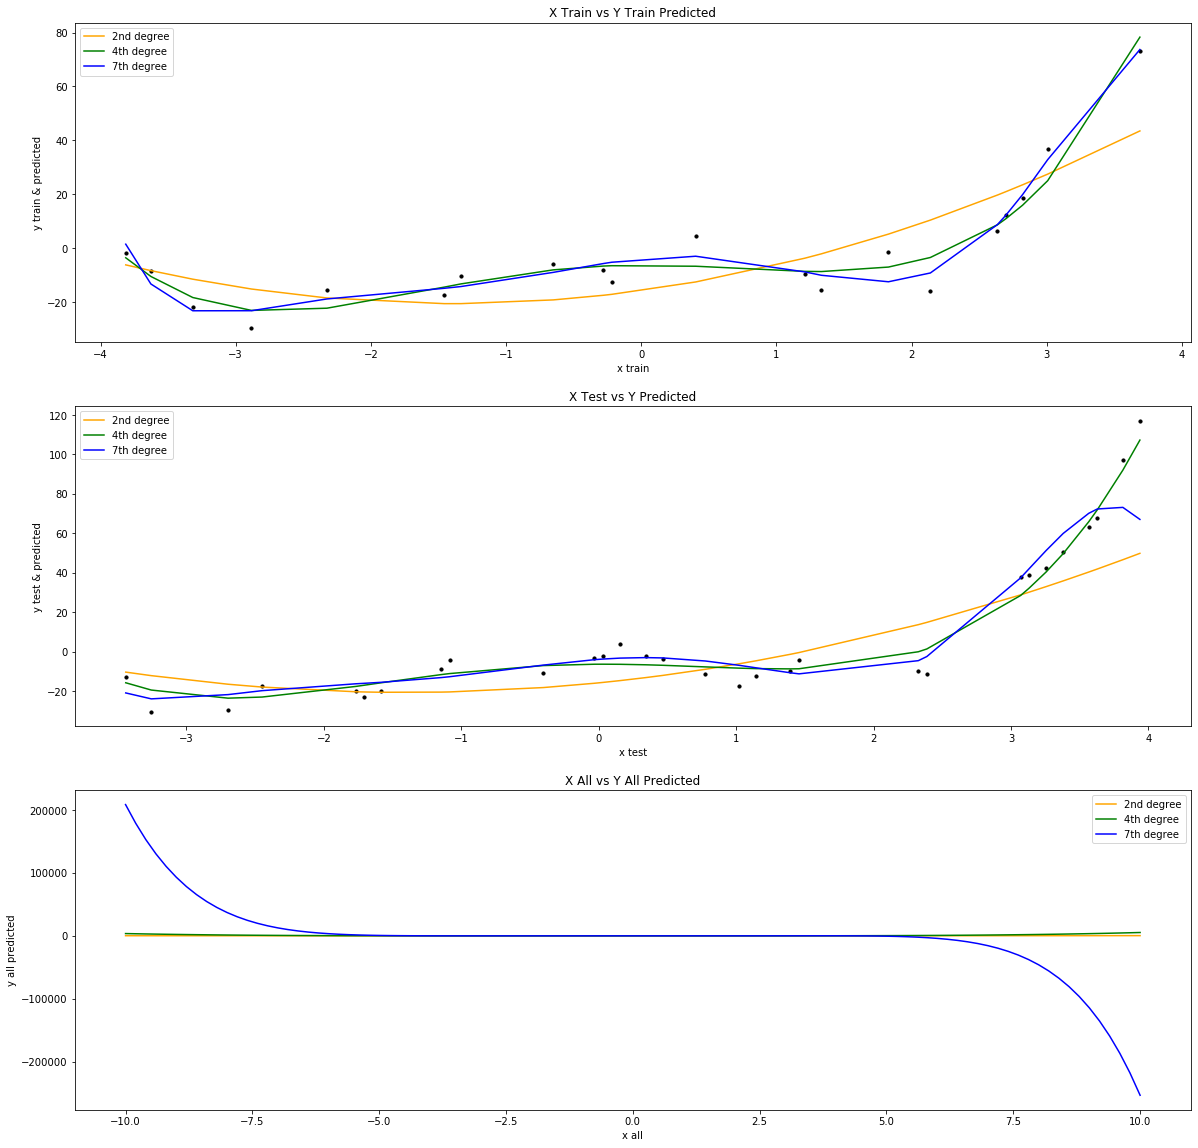

40% data
Train MSE for 2nd degree, 4th degree, and 7th degree polynomial respectively is as follows:
[150.33251286085704, 31.6245296464469, 25.492718751653634]
Test MSE for 2nd degree, 4th degree, and 7th degree polynomial respectively is as follows:
[405.80516696165745, 33.16428295918744, 61.237418845510426]


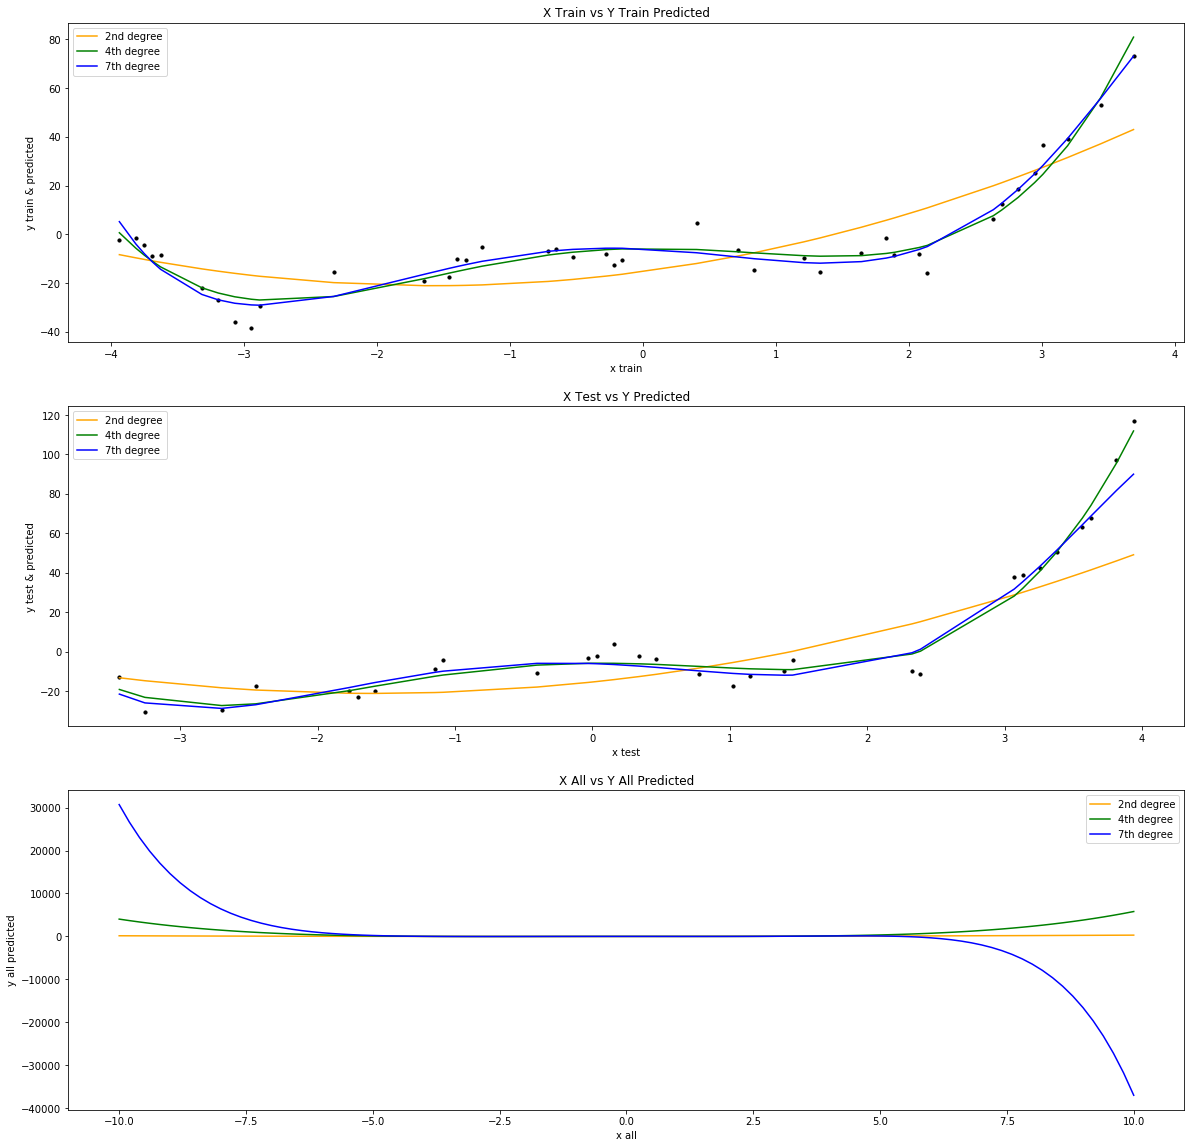

60% data
Train MSE for 2nd degree, 4th degree, and 7th degree polynomial respectively is as follows:
[150.08383759141728, 29.1928057399479, 26.099088642454408]
Test MSE for 2nd degree, 4th degree, and 7th degree polynomial respectively is as follows:
[403.2513784833407, 31.781415416196726, 60.16667237664542]


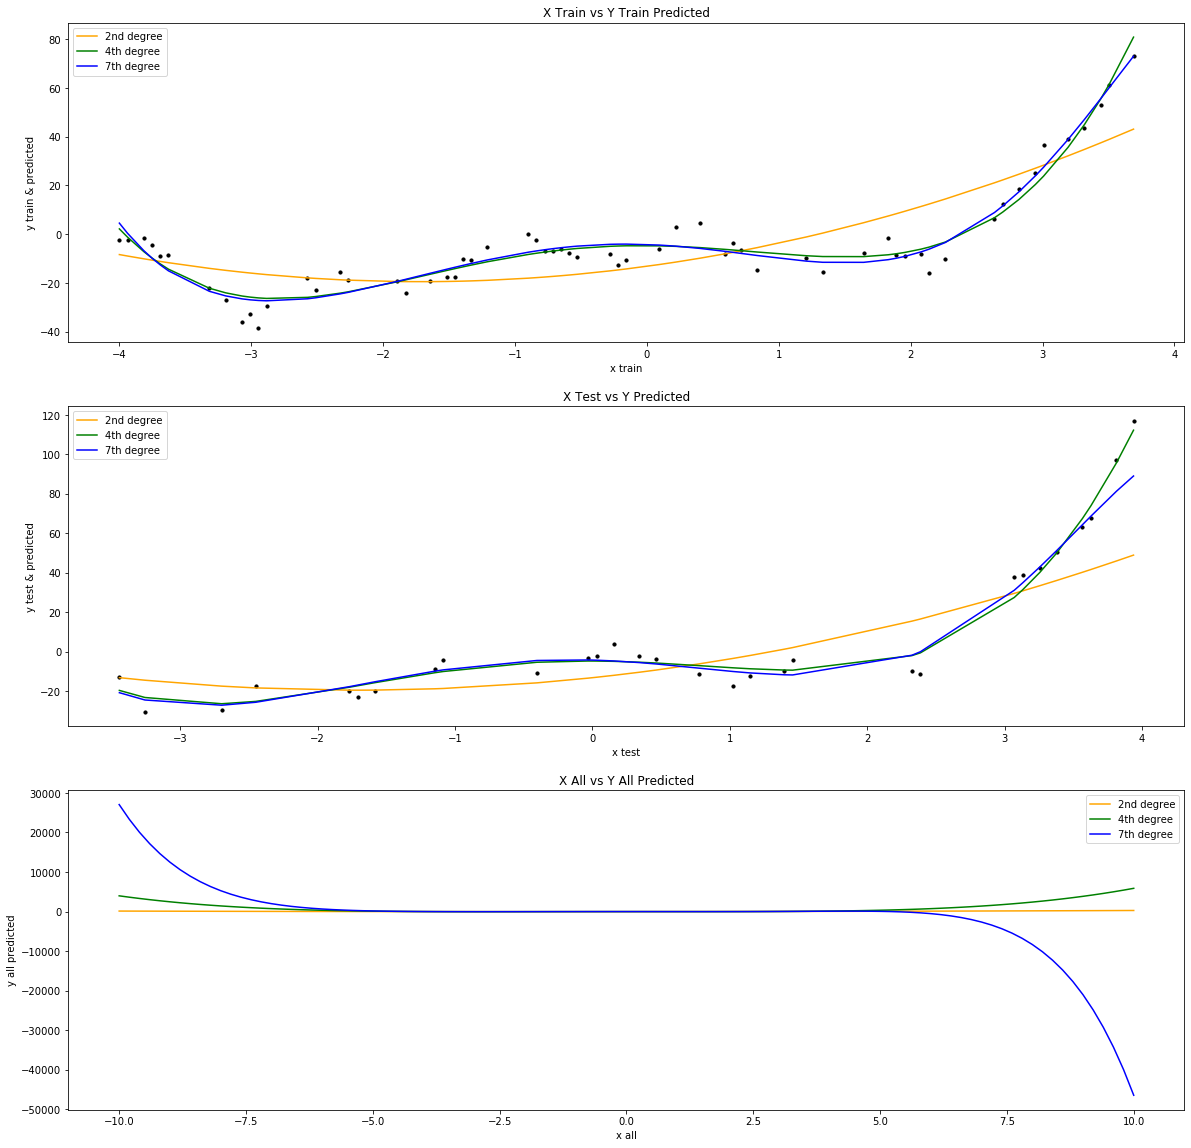

80% data
Train MSE for 2nd degree, 4th degree, and 7th degree polynomial respectively is as follows:
[168.1188246150281, 29.305108483323444, 26.549129596283638]
Test MSE for 2nd degree, 4th degree, and 7th degree polynomial respectively is as follows:
[407.59369688184694, 32.518106868742585, 48.0769352971077]


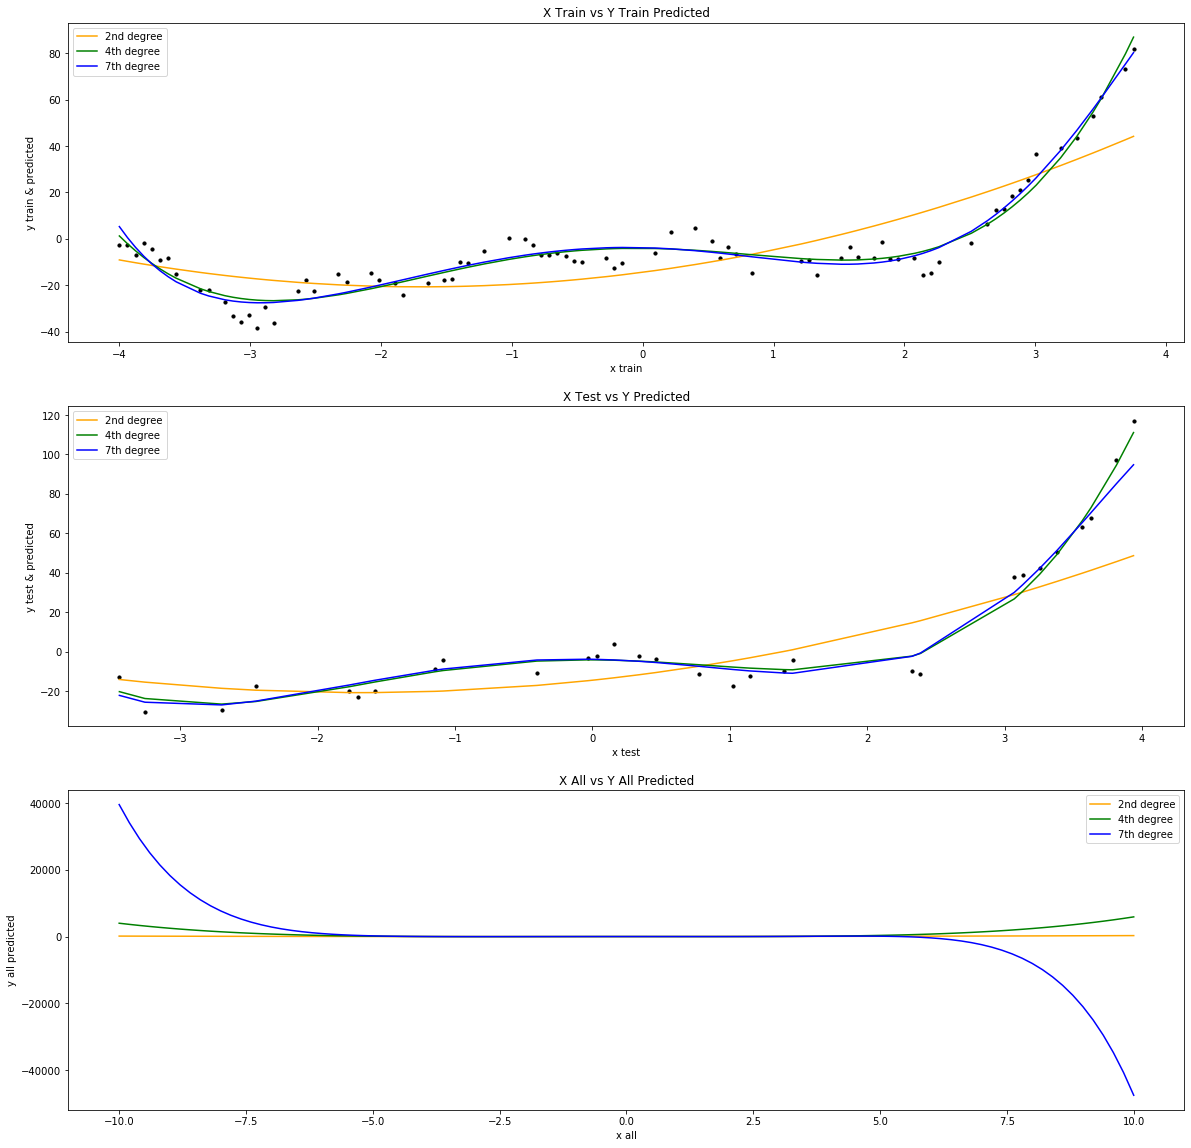

100% data
Train MSE for 2nd degree, 4th degree, and 7th degree polynomial respectively is as follows:
[247.29679797371534, 31.72001805729004, 30.677193592109738]
Test MSE for 2nd degree, 4th degree, and 7th degree polynomial respectively is as follows:
[320.0640834697786, 31.292082886606718, 33.410694077690145]


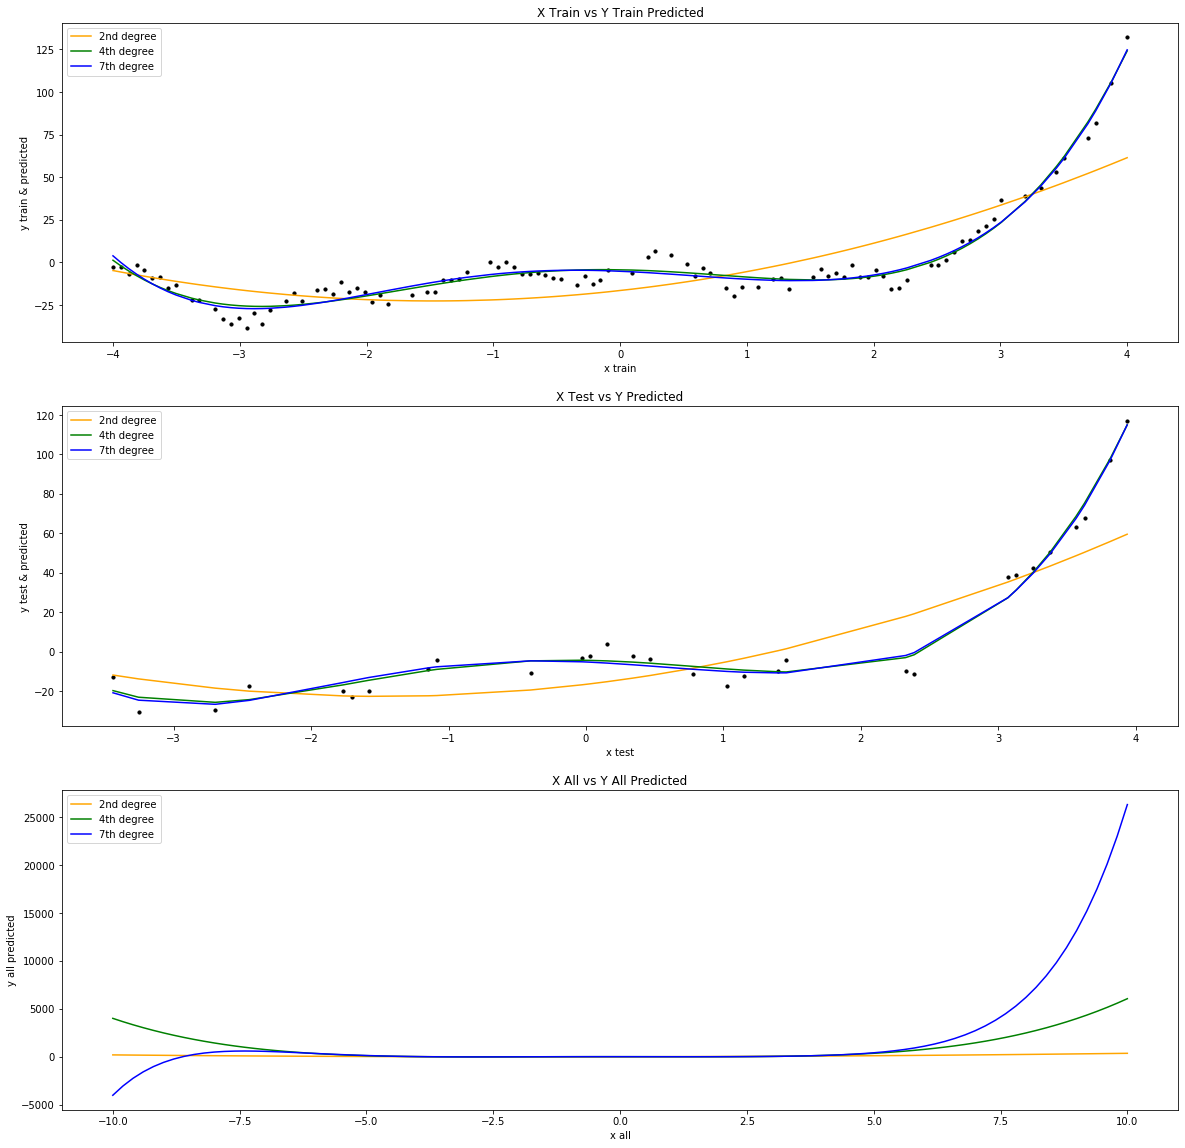

In [18]:
log_train_deg2_mse = []
log_train_deg4_mse = []
log_train_deg7_mse = []
log_test_deg2_mse = []
log_test_deg4_mse = []
log_test_deg7_mse = []

# Study the effects of the training data size on the bias and variance
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
log_train_deg2_mse.append(math.log(train_rmses_20[0]))
log_train_deg4_mse.append(math.log(train_rmses_20[1]))
log_train_deg7_mse.append(math.log(train_rmses_20[2]))
log_test_deg2_mse.append(math.log(test_rmses_20[0]))
log_test_deg4_mse.append(math.log(test_rmses_20[1]))
log_test_deg7_mse.append(math.log(test_rmses_20[2]))

print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
log_train_deg2_mse.append(math.log(train_rmses_40[0]))
log_train_deg4_mse.append(math.log(train_rmses_40[1]))
log_train_deg7_mse.append(math.log(train_rmses_40[2]))
log_test_deg2_mse.append(math.log(test_rmses_40[0]))
log_test_deg4_mse.append(math.log(test_rmses_40[1]))
log_test_deg7_mse.append(math.log(test_rmses_40[2]))

print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
log_train_deg2_mse.append(math.log(train_rmses_60[0]))
log_train_deg4_mse.append(math.log(train_rmses_60[1]))
log_train_deg7_mse.append(math.log(train_rmses_60[2]))
log_test_deg2_mse.append(math.log(test_rmses_60[0]))
log_test_deg4_mse.append(math.log(test_rmses_60[1]))
log_test_deg7_mse.append(math.log(test_rmses_60[2]))

print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
log_train_deg2_mse.append(math.log(train_rmses_80[0]))
log_train_deg4_mse.append(math.log(train_rmses_80[1]))
log_train_deg7_mse.append(math.log(train_rmses_80[2]))
log_test_deg2_mse.append(math.log(test_rmses_80[0]))
log_test_deg4_mse.append(math.log(test_rmses_80[1]))
log_test_deg7_mse.append(math.log(test_rmses_80[2]))

print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)
log_train_deg2_mse.append(math.log(train_rmses_100[0]))
log_train_deg4_mse.append(math.log(train_rmses_100[1]))
log_train_deg7_mse.append(math.log(train_rmses_100[2]))
log_test_deg2_mse.append(math.log(test_rmses_100[0]))
log_test_deg4_mse.append(math.log(test_rmses_100[1]))
log_test_deg7_mse.append(math.log(test_rmses_100[2]))


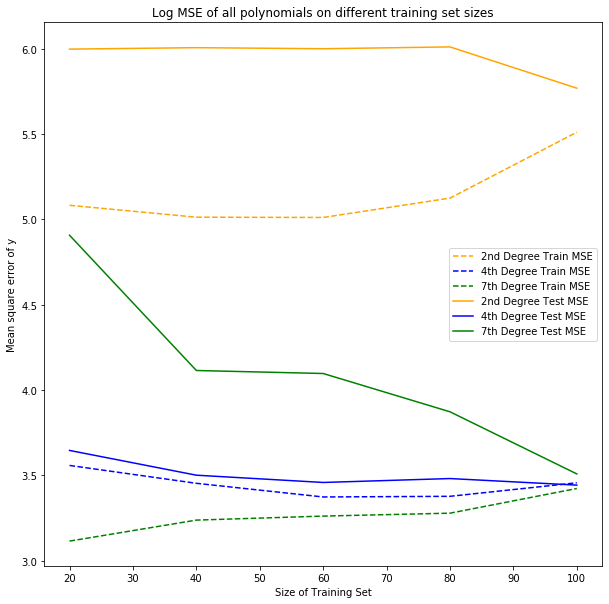

In [19]:
x=[20,40,60,80,100]
plt.figure(figsize=(10,10))
plt.plot(x, log_train_deg2_mse, color='orange', label='2nd Degree Train MSE', linestyle="dashed")
plt.plot(x, log_train_deg4_mse, color='blue', label='4th Degree Train MSE', linestyle="dashed")
plt.plot(x, log_train_deg7_mse, color='green', label='7th Degree Train MSE', linestyle="dashed")
plt.plot(x, log_test_deg2_mse, color='orange', label='2nd Degree Test MSE')
plt.plot(x, log_test_deg4_mse, color='blue', label='4th Degree Test MSE')
plt.plot(x, log_test_deg7_mse, color='green', label='7th Degree Test MSE')
plt.title('Log MSE of all polynomials on different training set sizes')
plt.xlabel('Size of Training Set')
plt.ylabel('Mean square error of y')
plt.legend()

From the above MSE vs Size of training set graph we can clearly see that:

**1) For 2nd degree polynomial curve**

This model is too simple to fit a complex curve hence we can see that the train and test MSE both are high and when we increase the training data size the MSE just keeps on increasing. After a certain extent the test MSE does increase implying the condition of overfitting.

**2) For 4th degree polynomial curve**

This model has the MSE for train and test data converge to a common point and it stays constant even after we increase the train data size showing us that this model is an ideal fit to the data. Both the train and test data are initially having a high value of MSE but then they both decrease and start to merge into a common line.

**3) For 7th degree polynomial curve**

This model has the MSE for train data increasing constantly irrespective of the data set size. Even if we increase the train data size the MSE doesn't decrease and just keeps on increasing showing us that the model is underfit and even increasing the data won't help now because the model is too complex for this situation. Whereas the test data just keeps on reducing the MSE which goes on reducing till it converges with the train data curve implying that it is interpreting the pattern but the patterns might be wrong.

# Answer : 

# Question 3: Stochastic Gradient Descent Improvements (10 pts)

### 1. (5 pts) Read this [blog](https://medium.com/optimization-algorithms-for-deep-neural-networks/gradient-descent-with-momentum-dce805cd8de8) on medium and describe in your own words how momentum leads to a faster convergence of the loss function. 


In order to answer this, I would first like to explain how gradient descent goes about convergence of a loss function with an example.  

Please refer to the picture attached below. In this scenario, **gradient descent** would reach point of **convergence** by **vertically oscillating in the horizontal direction**. This process is **slow and time-taking** and cannot be fastened even with a **higher learning rate** as we could end up **overshooting or diverging**.

In order to reach faster convergence, we need to **move slower in a vertical direction** to avoid overshooting and **faster in the horizontal direction** and that’s where **gradient descent with momentum algorithm** comes in, our knight in shining armor. 

Gradient descent with momentum **updates it’s weights** by taking an e**xponentially weighted average of dW and dB** instead of directly updating it with dW & dB which is what happens in regular regular gradient descent. 

What does this mean for us? **Smoother steps towards convergence**. Elaborating on the previously stated point, **oscillations in the vertical direction tend to average out to close to 0** as they’re in both negative and positive direction. As for the horizontal direction, the **derivatives are always pointing to the right, so the average remains big**. 

Hence this algorithm provides a much **more straight forward path** to **convergence** by **dampening out the oscillations**

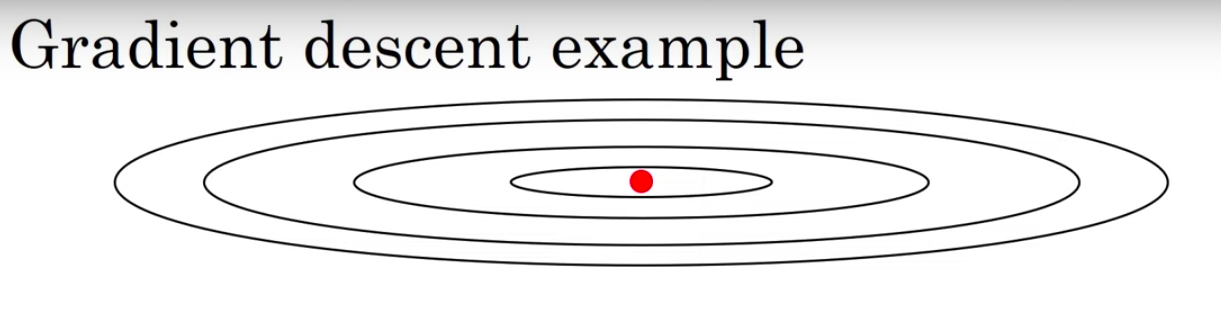

In [26]:
display.Image("https://raw.githubusercontent.com/GandhiDisha/Advanced-Machine-Learning-Course/master/Homework%202/images/gd.png", width="500")

### 2. (5 pts) Read this [blog](https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461) on medium and explain in your own words the advantages of Mini-batch Stochastic Gradient Descent. 

Before we get into discussing the advantages of mini-batch, I think it would be worthwhile to mention the pitfalls of Batch and Stochastic gradient descent 

Since batch gradient descent is computed over the entire training set and minimizing the summation of the loss. A lot of memory is consumed in the process and it is prone to local minimas

Stochastic Gradient Descent does cause noisiness that helps escape the local minima. But it is highly inefficient as we need to loop over the data set multiple times to find a good solution that leads to convergence

Mini-batch is a comprise between the two, it has the just enough noise to escape the local minima and is not as computationally inefficient as SGD as small batches of points are grouped together and we don’t need to loop over the entire data set. And it doesn’t consume as much memory as batch gradient descent

# Question 4: Stochastic Gradient Descent (30 pts)

### 1.(**10 pts**) Stochastic gradient descent derivation<br>

### Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：

### $$ y = w_0 + w_1e^{-x_1} + w_2 x_1 + w_3x_1x_2 $$ 

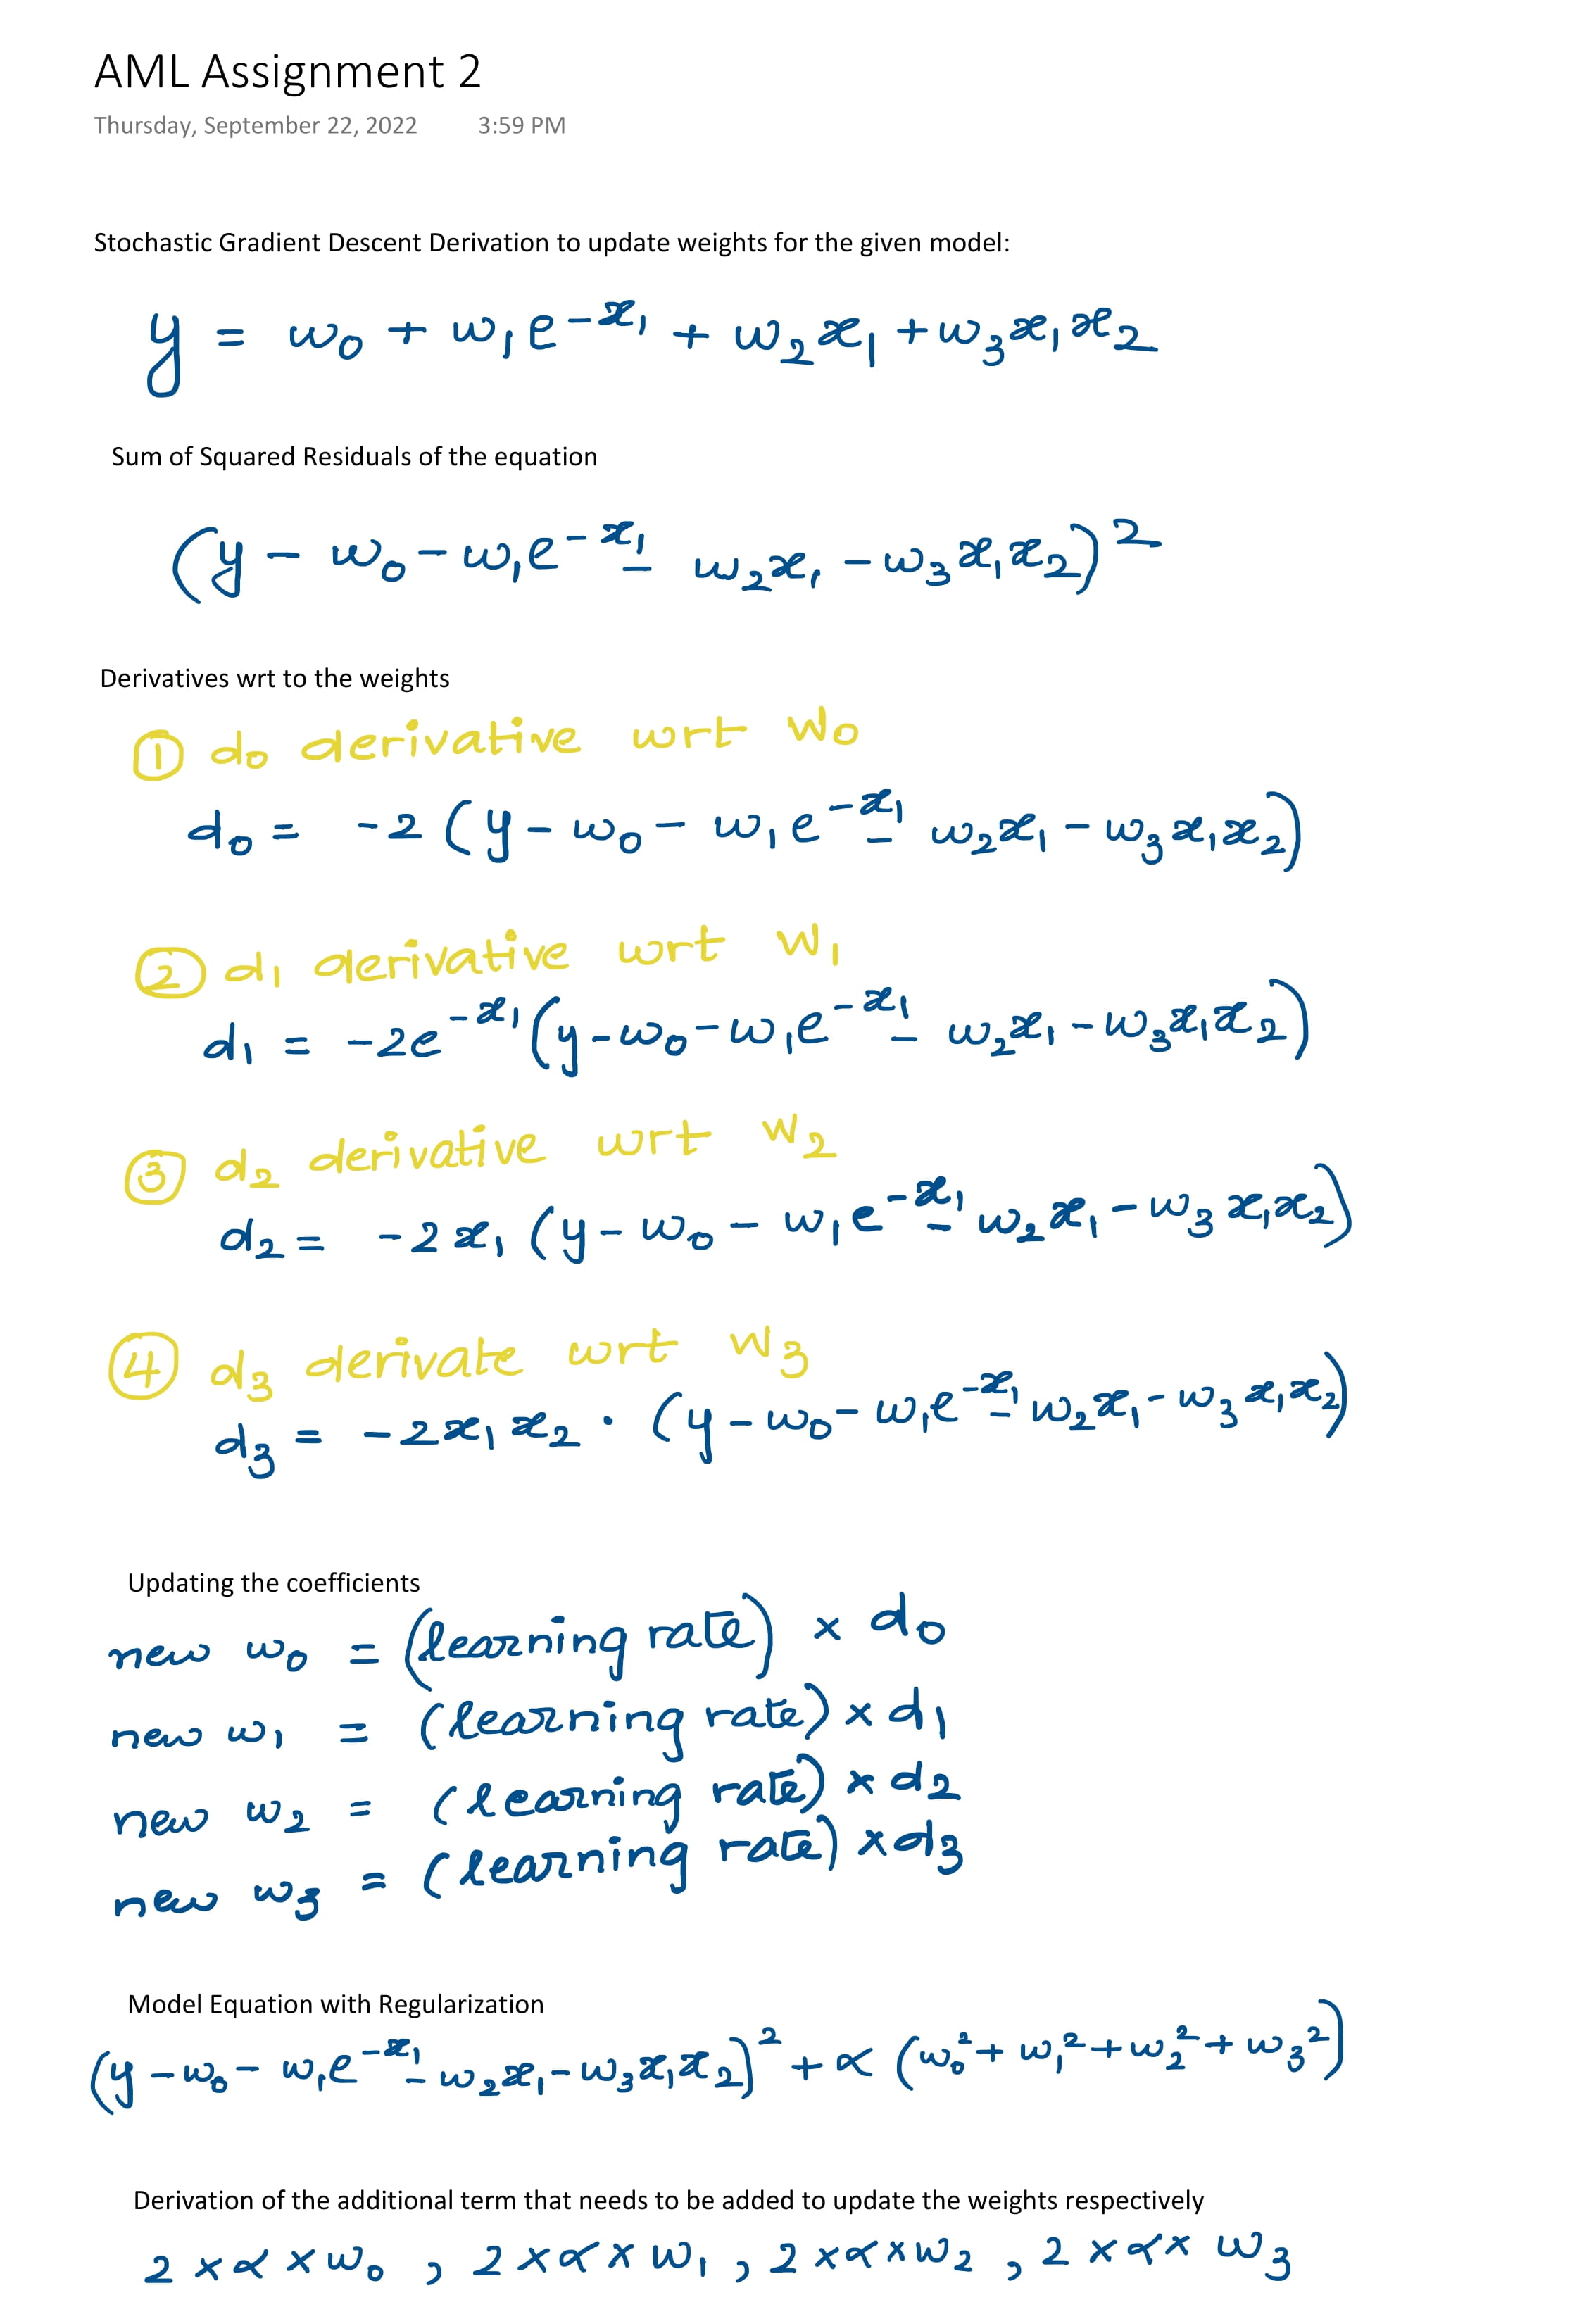

In [29]:
display.Image("https://raw.githubusercontent.com/GandhiDisha/Advanced-Machine-Learning-Course/master/Homework%202/images/q4.jpg", width="500")

### 2.(**20 pts**) Stochastic gradient descent coding <br>

### Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1e^{-x_1} + w_2x_1 + w_3x_1x_2 $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)

        
    def sgd(self, gradient):
        self.coef = self.coef+self.learning_rate*gradient
    
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                y_pred = X[i]*self.coef
                y_pred_total = y_pred.sum(axis=0)
                cost = y[i]-np.matmul(X[i], self.coef.transpose())

                # Compute gradients
                gradient = cost * X[i] - self.regularization * self.coef
               
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')
            
        return self.lowest_mse

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
      #compute the dot product of self.coef and X
      return np.dot(X, self.coef) #this line is just a placeholder, please delete this line in your code        

In [2]:
data = pd.read_csv('/Users/muskaansinghania/Downloads/SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

#### a) (**15 pts**) Use the expression derived in part 1 to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

In [3]:
df = pd.DataFrame(columns = ['l_rate','lamda','MSE']) 
mse_ridge_l=[] 
for l_rate in learning_rate:
    for lamda in regularization:
        lin_model=Regression(l_rate,lamda,n_epochs)
        mse_ridge =lin_model.fit(X, y, plot=False)
        df.loc[len(df)] = [l_rate,lamda,mse_ridge]

optimal_combi =df.sort_values(by='MSE')[:2]

,l_rate,lamda,MSE
6,0.010,0.0,0.027391
3,0.001,0.0,0.030496


The best combination learning rate value is 0.01
The best combination regularization constant is 0.0


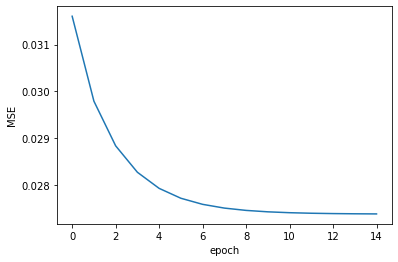

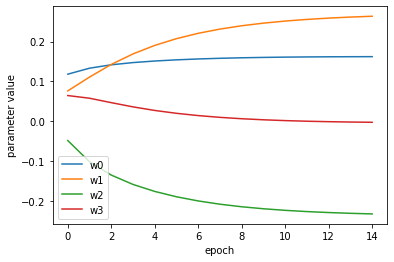

In [5]:
print('The best combination learning rate value is',optimal_combi['l_rate'].iloc[0])
print('The best combination regularization constant is', optimal_combi['lamda'].iloc[0])
lin_model =Regression(optimal_combi['l_rate'].iloc[0],optimal_combi['lamda'].iloc[0],n_epochs)
mse_ridge=lin_model.fit(X, y,plot=True)

The second best combination learning rate value is 0.001
The second best combination regularization constant is 0.0


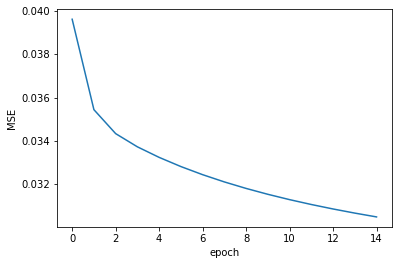

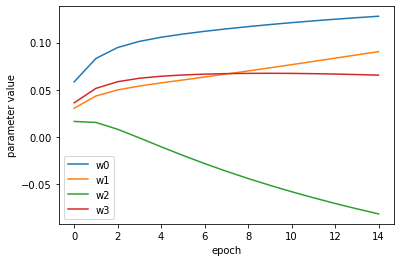

In [6]:
print('The second best combination learning rate value is',optimal_combi['l_rate'].iloc[1])
print('The second best combination regularization constant is', optimal_combi['lamda'].iloc[1])
lin_model =Regression(optimal_combi['l_rate'].iloc[1],optimal_combi['lamda'].iloc[1],n_epochs)
mse_ridge=lin_model.fit(X, y,plot=True)

#### b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [8]:
print('MSE of the two best combinations of learning rate and regualrization constant')
optimal_combi

MSE of the two best combinations of learning rate and regualrization constant


,l_rate,lamda,MSE
6,0.010,0.0,0.027391
3,0.001,0.0,0.030496
